## Data and One-Hot-Encoder

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Computer Hardware Dataset.csv')
print(data)

                Brand Component  Base Clock(GHz)  Turbo Clock(GHz)  Cores  \
0                 AMD       CPU             4.50              5.70     16   
1                 AMD       CPU             4.50              5.40      8   
2                 AMD       CPU             3.80              5.10      6   
3               Intel       CPU             3.00              5.20     24   
4               Intel       CPU             3.40              5.30     16   
5               Intel       CPU             3.50              5.10     14   
6                ASUS       GPU             1.90              2.50      0   
7                 MSI       GPU             2.30              2.60      0   
8            GIGABYTE       GPU             2.30              2.60      0   
9             Corsair       RAM             0.00              0.00      0   
10            Corsair       RAM             0.00              0.00      0   
11      G.Skill Aegis       RAM             0.00              0.00      0   

In [ ]:
print(data['Brand'].unique())
print(data['Component'].unique())

['AMD' 'Intel' 'ASUS' 'MSI' 'GIGABYTE' 'Corsair' 'G.Skill Aegis' 'Samsung'
 'Gigabyte' 'Crucial Ballistix' 'Sabrent Rocket' 'ADATA' 'EVGA' 'INNO3D'
 'G.Skill' 'Seagate']
['CPU' 'GPU' 'RAM' 'SSD']


In [ ]:
data['Brand'].value_counts()
data['Component'].value_counts()

CPU    10
GPU    10
RAM    10
SSD    10
Name: Component, dtype: int64

In [ ]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Brand', 'Component'])
print(one_hot_encoded_data)

    Base Clock(GHz)  Turbo Clock(GHz)  Cores  Memory_Size(GB)  RAM_Speed(MHz)  \
0              4.50              5.70     16                0               0   
1              4.50              5.40      8                0               0   
2              3.80              5.10      6                0               0   
3              3.00              5.20     24                0               0   
4              3.40              5.30     16                0               0   
5              3.50              5.10     14                0               0   
6              1.90              2.50      0               12               0   
7              2.30              2.60      0               12               0   
8              2.30              2.60      0               12               0   
9              0.00              0.00      0               32            3200   
10             0.00              0.00      0               16            3000   
11             0.00         

## Data Preprocessing

In [ ]:
each_component_features = ['Base Clock(GHz)', 'Turbo Clock(GHz)', 'Cores', 'Memory_Size(GB)', 'RAM_Speed(MHz)']
categorical_features = [
    col for col in one_hot_encoded_data.columns
    if col.startswith('Component_')
]
X = one_hot_encoded_data[each_component_features + categorical_features]
X.head()

,Base Clock(GHz),Turbo Clock(GHz),Cores,Memory_Size(GB),RAM_Speed(MHz),Component_CPU,Component_GPU,Component_RAM,Component_SSD
0,4.5,5.7,16,0,0,1,0,0,0
1,4.5,5.4,8,0,0,1,0,0,0
2,3.8,5.1,6,0,0,1,0,0,0
3,3.0,5.2,24,0,0,1,0,0,0
4,3.4,5.3,16,0,0,1,0,0,0


In [ ]:
y = one_hot_encoded_data['Price']
y.head()

0    544.02
1    318.44
2    216.89
3    522.99
4    369.99
Name: Price, dtype: float64

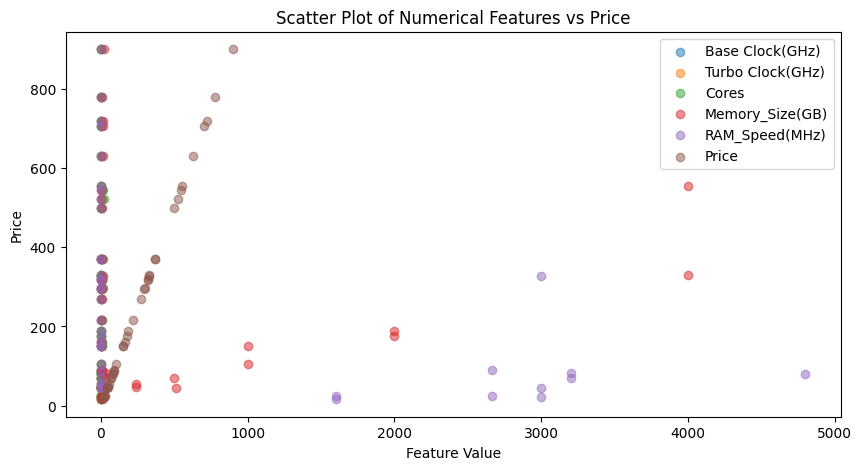

In [ ]:
numerical_features = ['Base Clock(GHz)', 'Turbo Clock(GHz)', 'Cores', 'Memory_Size(GB)', 'RAM_Speed(MHz)', 'Price']
plt.figure(figsize=(10, 5))
for feature in numerical_features:
    plt.scatter(data[feature], data['Price'], label=feature, alpha=0.5)

plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.title('Scatter Plot of Numerical Features vs Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28, 9) (12, 9) (28,) (12,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, lr_model.predict(X_train))
print('Training mse: ', train_mse)

Training mse:  12564.166853173954


## Evaluation

In [ ]:
test_mse = mean_squared_error(y_test, lr_model.predict(X_test))
print('Test mse: ', test_mse)

Test mse:  15387.608158948095
